# Conectando python a IBM DB2

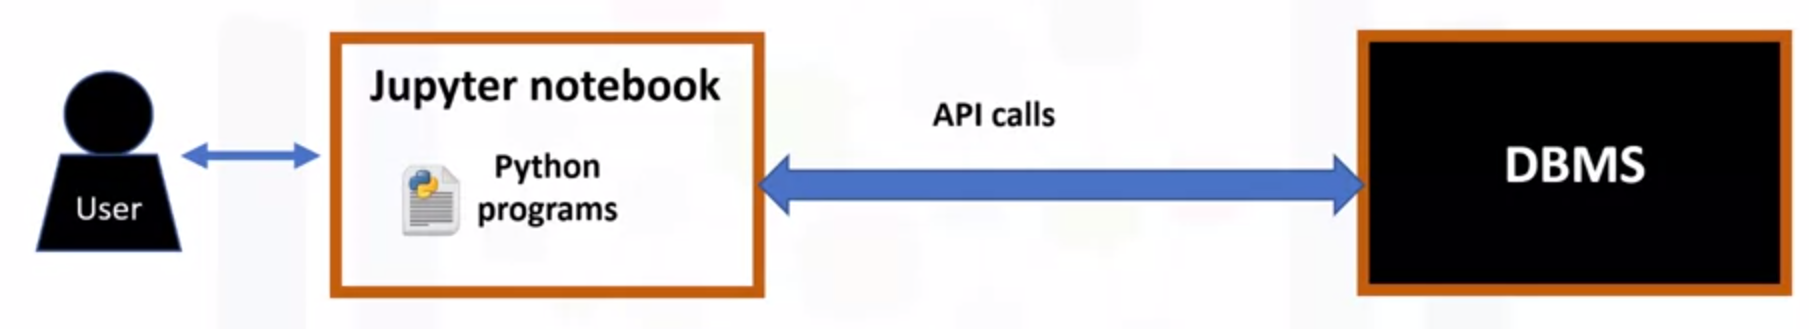

## Que es una API (Application Programming Interface)

Una API es un conjunto de definiciones y protocolos que se utiliza para desarrollar e integrar el software de las aplicaciones. API significa interfaz de programación de aplicaciones.

Las API permiten que sus productos y servicios se comuniquen con otros, sin necesidad de saber cómo están implementados. Esto simplifica el desarrollo de las aplicaciones y permite ahorrar tiempo y dinero. Las API le otorgan flexibilidad; simplifican el diseño, la administración y el uso de las aplicaciones, y proporcionan oportunidades de innovación, lo cual es ideal al momento de diseñar herramientas y productos nuevos (o de gestionar los actuales).

Tomado de: https://www.redhat.com/es/topics/api/what-are-application-programming-interfaces

###### --------------------------------------------------------

Una API es un conjunto de funciones que se pueden llamar para obtener acceso a algunos tipos de servidores.

## SQL API

SQL API consiste en una libreria de llamadas a funciones como una API para DBMS.

Para pasar comandos SQL al DBMS, una aplicacion de programa llama funciones en la API, y llama a otras funciones para retornar resultados (query results) e informacion del estado desde la DBMS:

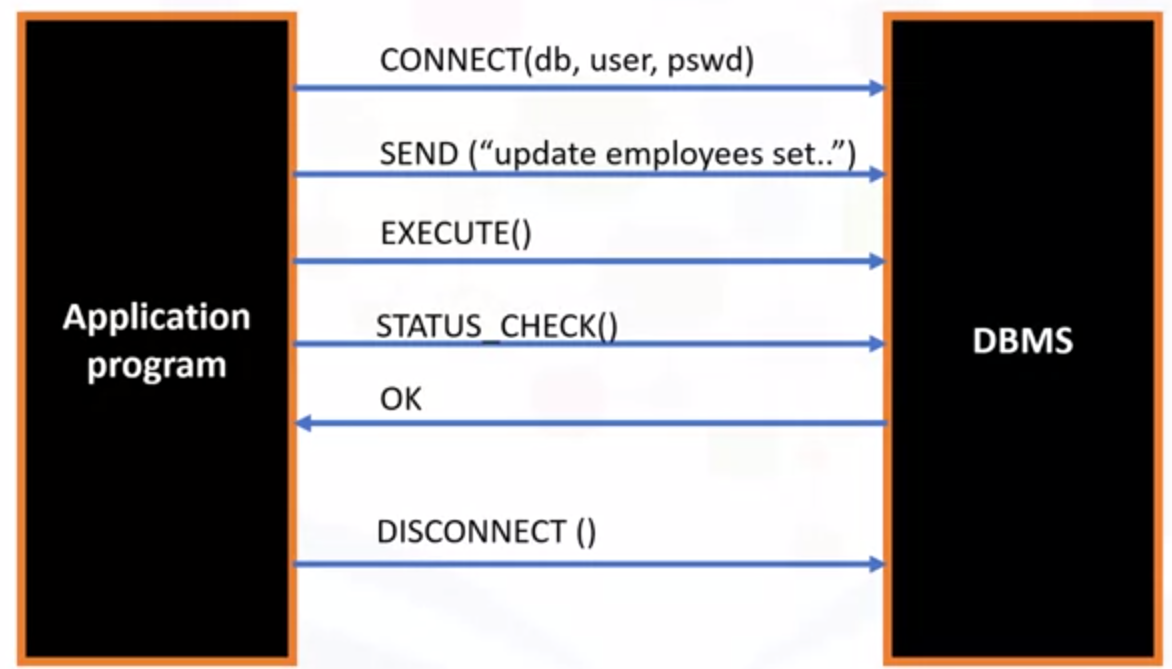

## APIs usadas por DBMS  mas populares

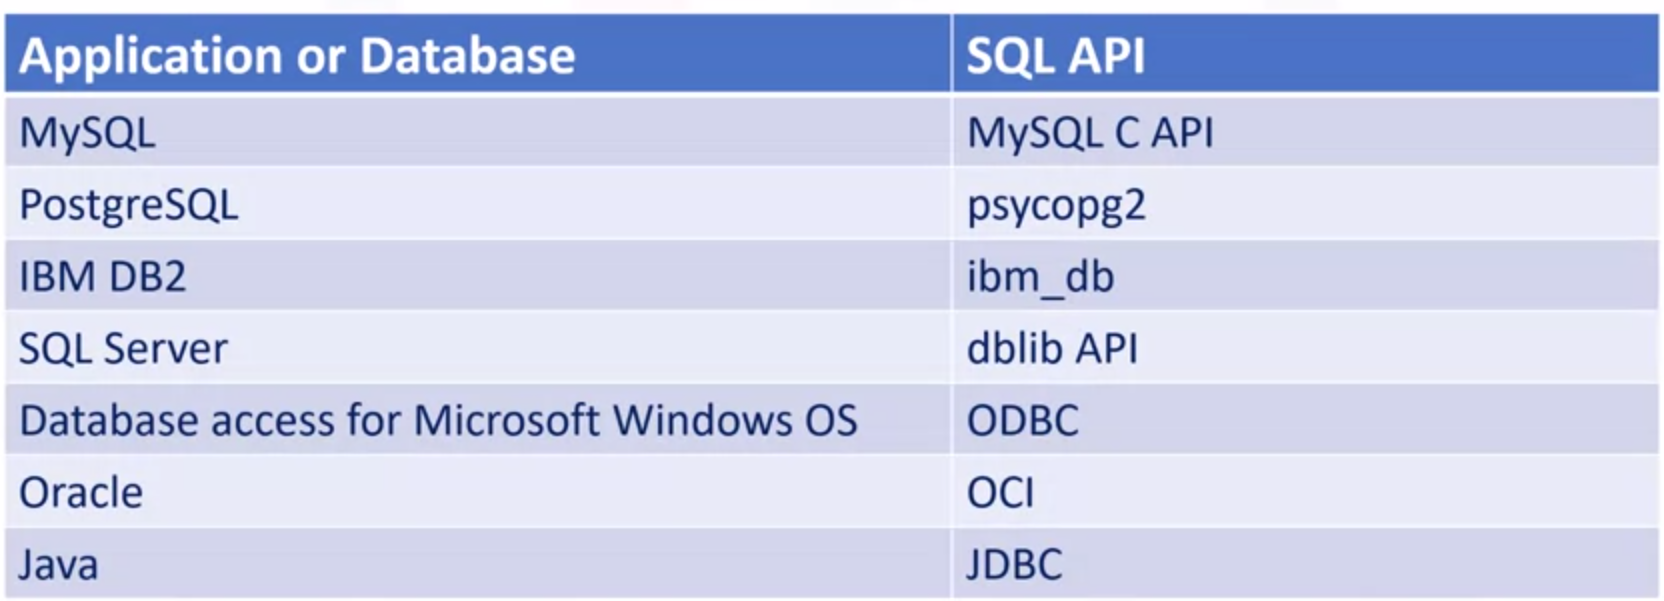

* MySQL C API: Conexion a programas en lenguaje C.
* psycopg2: Conexion a programas en python.
* ibm_db: Conexion a programas en python.

## Escribir codigo usando DB API

1. <span class="mark">Objetos Conexion</span>: Permiten la coneccion a la base de datos y maneja las transacciones.


2. <span class="mark">Objetos Cursor</span>: Son usados para correr queries. Son estructuras de control que permiten atravesar los registros de una base de datos. Se comporta como un nombre de archivo en un lenguaje de programacion, el cual al ser llamado permite el acceso a los resultados obtenidos desde la base de datos.

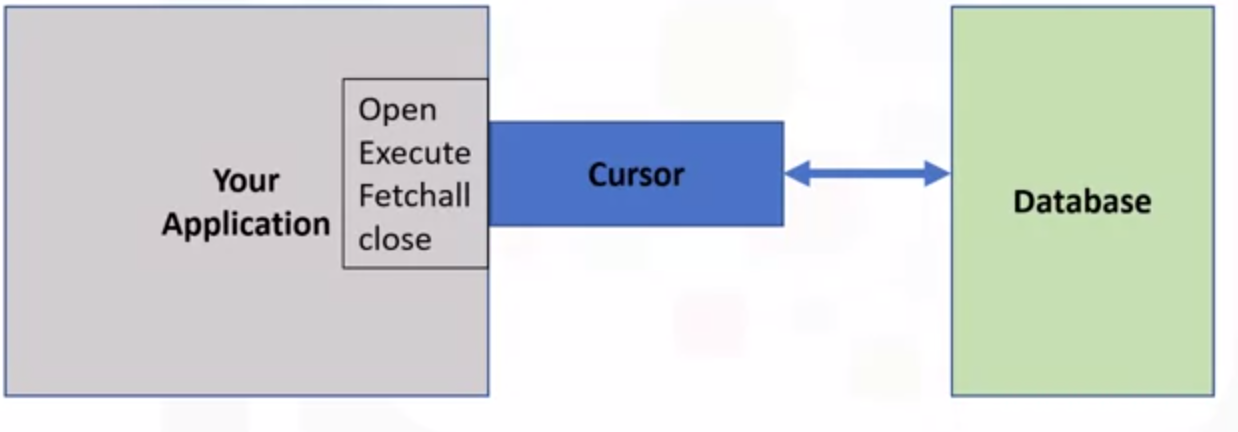

### Metodos Connection()

1. cursor(): Retorna un nuevo cursor usando la conexion.

2. commit(): Usado para enviar cualquier transaccion pendiente a la base de datos.

3. rollback(): Permite a la base de datos volver al comienzo de alguna transaccion pendiente.

4. close(): Usado para cerrar la coneccion a la base de datos.

### Metodos cursor()

1. callproc()

2. execute()

3. executemany()

4. fetchone()

5. fetchmany()

6. fetchall()

7. nextset()

8. Arraysize()

9. close()

### Ejemplo de una conexion 

In [ ]:
pip install ibm_db

In [1]:
import ibm_db

In [6]:
dsn_driver = "IBM DB2 ODBC DRIVER"
dsn_database = "BLUDB"
dsn_hostname = "dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net"
dsn_port = "50000"
dsn_protocol = "TCPIP"
dsn_uid = "trh78602"
dsn_pwd = "m9bc54ntb+fqf4cv"

In [7]:
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

In [13]:
try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Conectado al database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Imposible conectar:", ibm_db.conn_errormsg() )

Conectado al database:  BLUDB as user:  trh78602 on host:  dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net


In [14]:
#Obtener Metadata desde el Database Server
server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)

DBMS_NAME:  DB2/LINUXX8664
DBMS_VER:   11.01.0404
DB_NAME:    BLUDB


In [10]:
#Obtener Metadata desde el Database Client / Driver
client = ibm_db.client_info(conn)

print ("DRIVER_NAME:          ", client.DRIVER_NAME) 
print ("DRIVER_VER:           ", client.DRIVER_VER)
print ("DATA_SOURCE_NAME:     ", client.DATA_SOURCE_NAME)
print ("DRIVER_ODBC_VER:      ", client.DRIVER_ODBC_VER)
print ("ODBC_VER:             ", client.ODBC_VER)
print ("ODBC_SQL_CONFORMANCE: ", client.ODBC_SQL_CONFORMANCE)
print ("APPL_CODEPAGE:        ", client.APPL_CODEPAGE)
print ("CONN_CODEPAGE:        ", client.CONN_CODEPAGE)

DRIVER_NAME:           DB2CLI.DLL
DRIVER_VER:            11.05.0400
DATA_SOURCE_NAME:      BLUDB
DRIVER_ODBC_VER:       03.51
ODBC_VER:              03.01.0000
ODBC_SQL_CONFORMANCE:  EXTENDED
APPL_CODEPAGE:         1252
CONN_CODEPAGE:         1208


In [11]:
ibm_db.close(conn)

True

### Crear tablas, cargar datos y solicitar datos

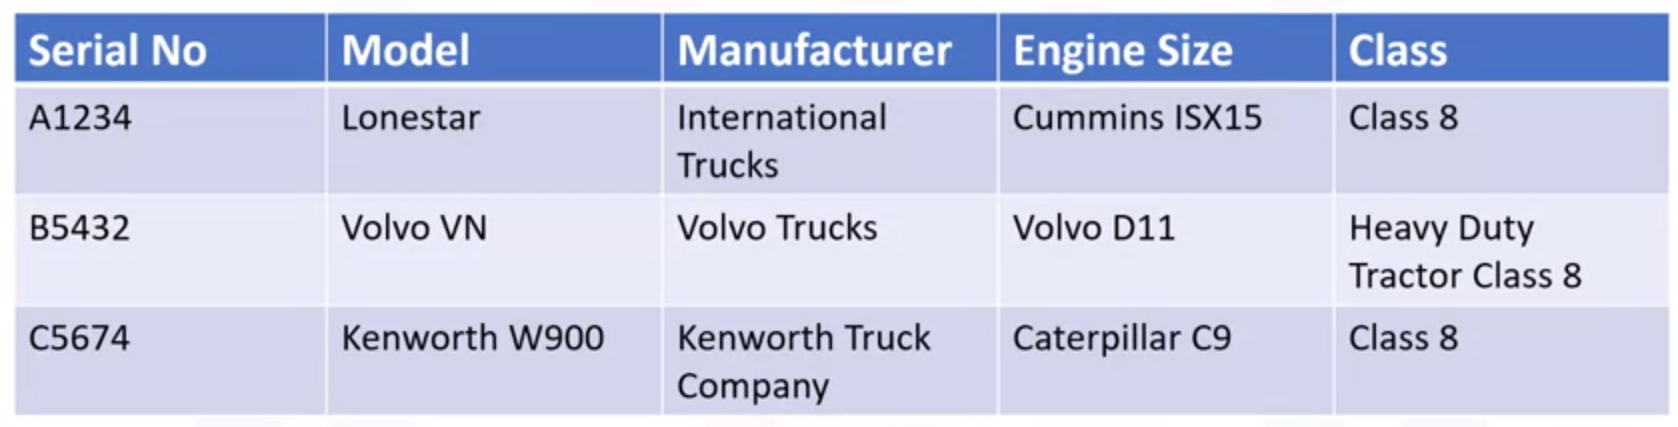

In [15]:
stmt = ibm_db.exec_immediate(conn,
                            """CREATE TABLE Trucks(
                            Serial_no VARCHAR(20) PRIMARY KEY NOT NULL,
                            Model VARCHAR(20) NOT NULL,
                            Manufacturer VARCHAR(20) NOT NULL,
                            Engine_size VARCHAR(20) NOT NULL,
                            Truck_class VARCHAR(20) NOT NULL
                            );""")

In [16]:
stmt = ibm_db.exec_immediate(conn,
                             """INSERT INTO Trucks
                             (Serial_no, Model, Manufacturer, Engine_size, Truck_class)
                             VALUES('A1234', 'Lonestar', 'International Trucks', 'Cummins ISX15', 'Class 8');""")

In [20]:
stmt = ibm_db.exec_immediate(conn,
                             """INSERT INTO Trucks
                             (Serial_no, Model, Manufacturer, Engine_size, Truck_class)
                             VALUES('B5432', 'Volvo VN', 'Volvo Trucks', 'Volvo D11', 'Tractor Class 8'),
                             ('C5674', 'Kenworth w900', 'Kenworth', 'Caterpillar C9', 'Class 8');""")

In [21]:
stmt = ibm_db.exec_immediate(conn, "SELECT * FROM Trucks")
ibm_db.fetch_both(stmt)

{'SERIAL_NO': 'A1234',
 0: 'A1234',
 'MODEL': 'Lonestar',
 1: 'Lonestar',
 'MANUFACTURER': 'International Trucks',
 2: 'International Trucks',
 'ENGINE_SIZE': 'Cummins ISX15',
 3: 'Cummins ISX15',
 'TRUCK_CLASS': 'Class 8',
 4: 'Class 8'}

In [23]:
import pandas as pd
import ibm_db_dbi
pconn = ibm_db_dbi.Connection(conn)
df = pd.read_sql('SELECT * FROM Departments', pconn)
df

,DEPT_ID_DEP,DEP_NAME,MANAGER_ID,LOC_ID
0,2,Architect Group,30001,L0001
1,5,Software Group,30002,L0002
2,7,Design Team,30003,L0003


In [24]:
ibm_db.close(conn)

True